<a href="https://colab.research.google.com/github/MaricelaMH/Simulacion-1/blob/main/metropolisHastings(bin).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
#se define funcion objetivo
def target(lik, prior, param, theta):
    if theta < 0 or theta >1:
        return 0
    else:
        return lik(param[0], theta).pmf(param[1])*prior.pdf(theta)


La funcion target devuelve la función de probabilidad de masa (pmf) del likelihood (binomial), con param[0]=14 experimentos y param[1]=10 exitos (caras). $\theta:= probabilidad$

In [3]:
def metropolissampler(niters, lik, prior, theta, param, sigma):
    samples = np.zeros(niters+1)
    samples[0] = theta

    for i in range(niters):
        theta_p = theta + st.norm(0, sigma).rvs()
        rho = min(1, target(lik, prior, param, theta_p)/target(lik, prior, param, theta))
        u = np.random.uniform()
        if u < rho:
            theta = theta_p
        samples[i+1] = theta
    return samples

    #nmcmc = len(samples)//2


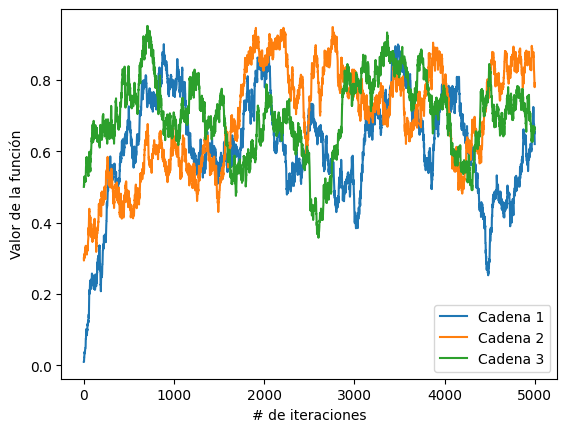

In [4]:
param = [14,10] #14 trials and 10 heads

#params beta function

prior = st.beta(1,1)
#se define el likelihood como una dist binomial
#por tratarse del volado

lik = st.binom
#prior = st.beta(a,b) #prior que obedece dist beta a=1, b=1.
sigma = 0.01 #std dev

theta = [0.01,0.3,0.5] # guess for p

niters = 5000

cadenas=[]
nchains = 3

for i in range(nchains):
    cadenas.append(metropolissampler(niters, lik, prior, theta[i], param, sigma))
    plt.plot(cadenas[i], '-', label = "Cadena "+str(i+1))

plt.xlabel("# de iteraciones")
plt.ylabel("Valor de la función")
plt.legend()

plt.savefig('convergencia.png')

plt.show()
